###### %%writefile test
## Homework 2 (Morphological Filter)
1. Input image from gear_tooth.png.
2. The objective is to detect missing teeth using a sequence of morphological filters.
3. Design a set of structure elements: <b>gear_body</b>, <b>sampling_ring_spacer</b>, <b>sampling_ring_width</b>, <b>tip_spacing</b>, <b>defect_cue</b>
4. Apply morphological filters using the structure elements to generate the figures (e), (f), (g), (h)
<br>&nbsp;(e) opening it with structure element <b>gear_body</b> to get rid of the teeth, dilating that with structure element <b>sampling_ring_spacer</b> to bring it out to the base of the teeth, dilating that with the structure element <b>sampling_ring_width</b> to bring the next image out to the tip of the teeth, and subtracting the last two results to get a ring that just fits over the teeth.
<br>&nbsp;(f) AND it with the original image to produce an image of just the teeth.
<br>&nbsp;(g) dilating the teeth image with the structure element <b>tip_spacing</b> produces the solid ring image which has spaces in the solid ring wherever there are defects in the teeth.
<br>&nbsp;(h) subtracting it from the sampling ring leaves only the defects, which are dilated by structure element <b>defect_cue</b>.
5. Show the output images.
6. Write a simple report in a separate cell.
7. Upload your Jupyter code file (*.ipynb)
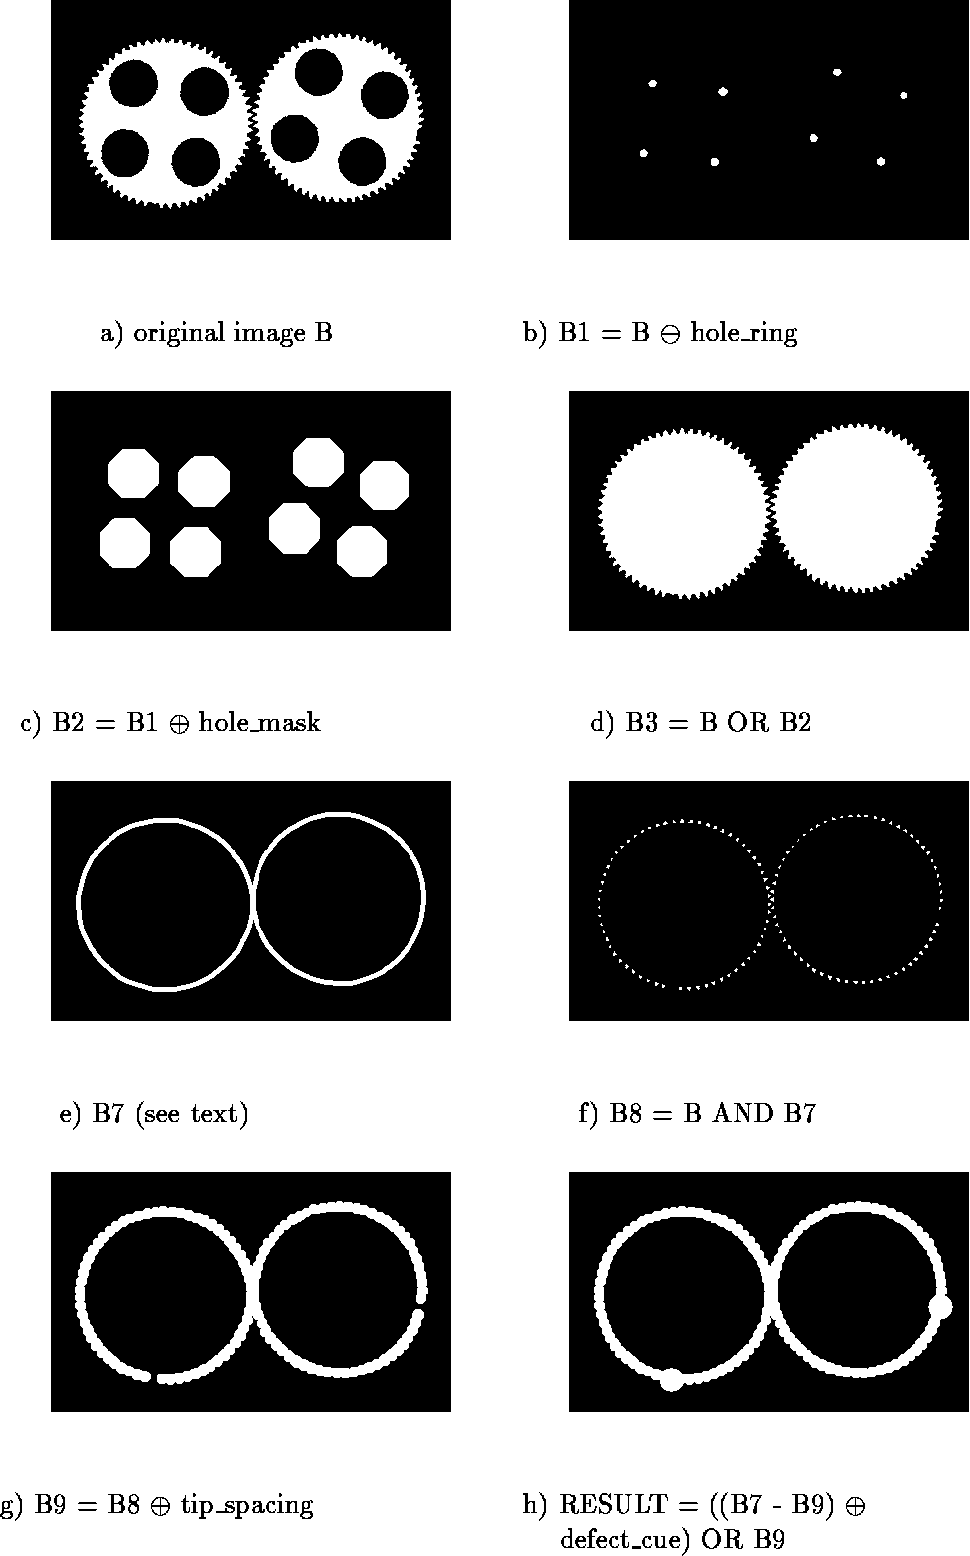

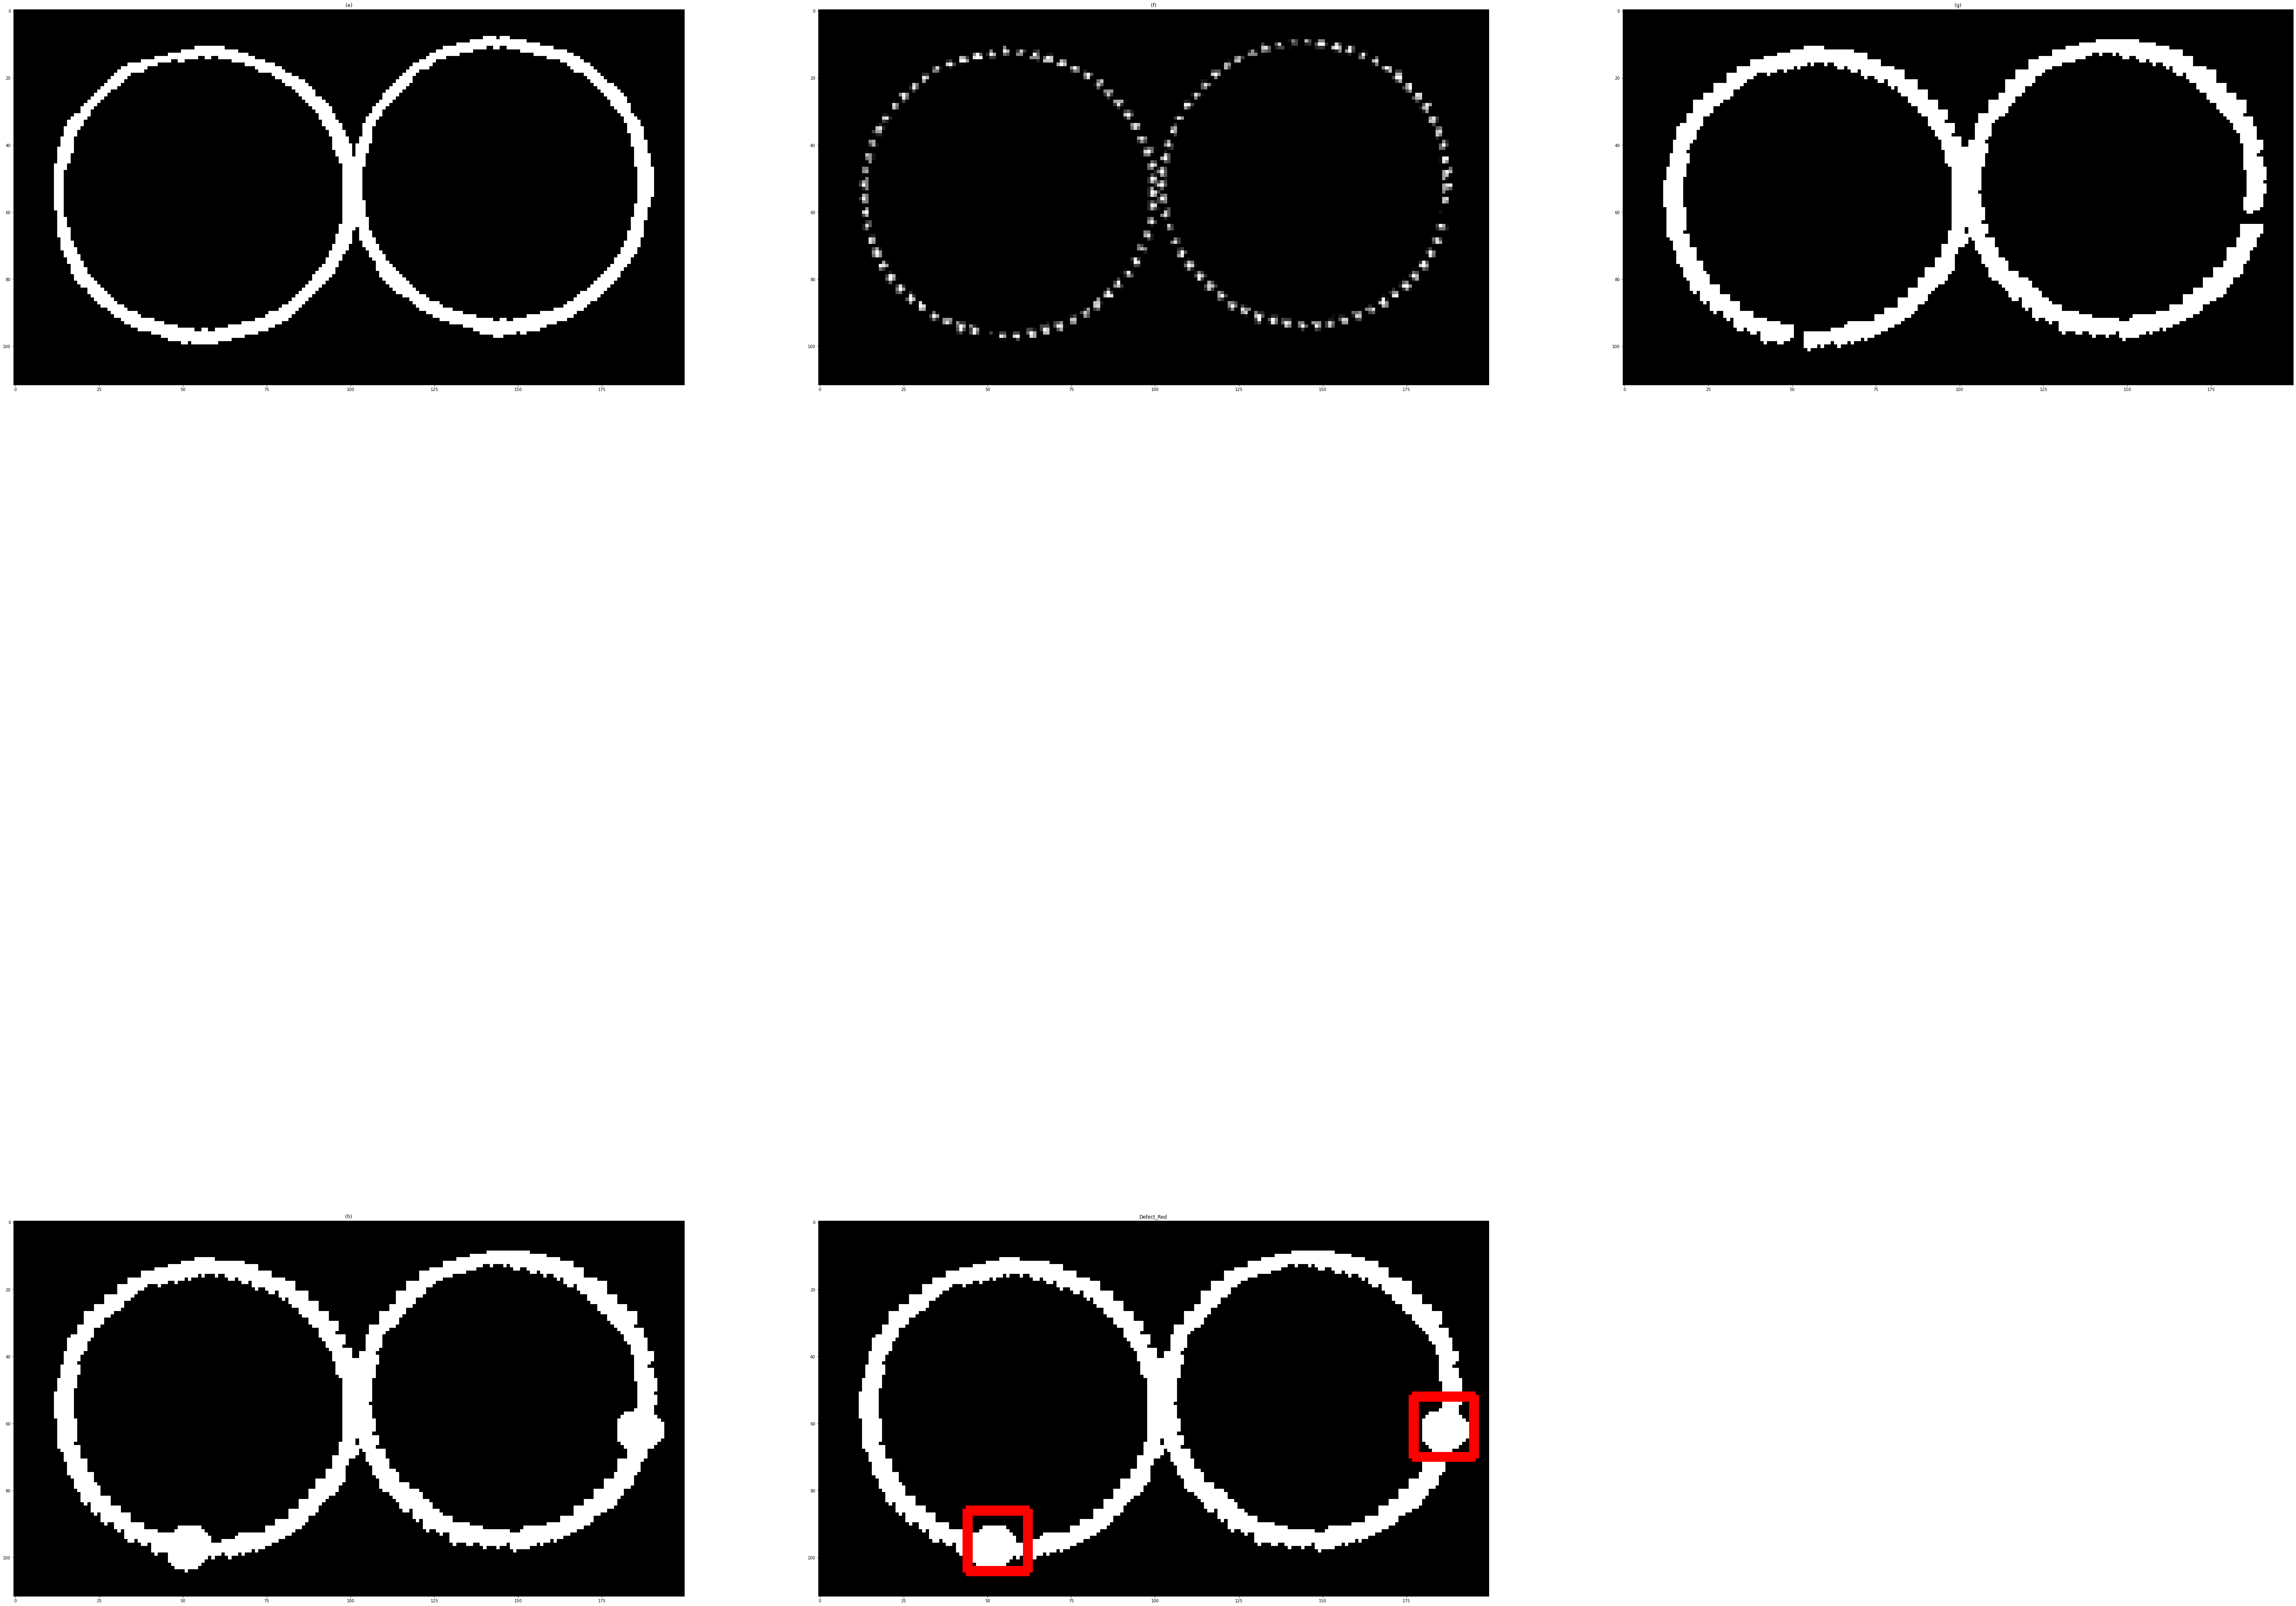

In [4]:
#gear tooth inspection using morphological filter

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./docs/img/gear_tooth.png', cv2.IMREAD_GRAYSCALE)
retval, img_a = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY)

kernel_dot = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
kernel_hole_e = cv2.erode(kernel_hole, kernel_dot, iterations=1)
kernel_hole_ring = kernel_hole - kernel_hole_e

img_b = cv2.erode(img_a, kernel_hole_ring, iterations=1)
img_c = cv2.dilate(img_b, kernel_hole, iterations=1)
img_d = cv2.bitwise_or(img, img_c)

gear_body = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
sampling_ring_spacer = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
sampling_ring_width = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

img_d=img_d[33:145,50:250]

tmp=img_d.copy()
opened = cv2.morphologyEx(tmp, cv2.MORPH_OPEN, gear_body)
tmp1=cv2.dilate(opened,sampling_ring_spacer,iterations=1)
tmp2=cv2.dilate(tmp1,sampling_ring_width,iterations=1)
ring=tmp2-opened
gear=cv2.bitwise_and(ring,img_d)
_, ring = cv2.threshold(src=ring, thresh=5, maxval=255,type=cv2.THRESH_BINARY)

tip_spacing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
tip = cv2.morphologyEx(gear, cv2.MORPH_OPEN, tip_spacing)
tip_spacing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
tip=cv2.dilate(tip,tip_spacing,iterations=1)
_, tip = cv2.threshold(src=tip, thresh=1, maxval=255,type=cv2.THRESH_BINARY)

sub=ring-tip
sub_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
sub = cv2.morphologyEx(sub, cv2.MORPH_OPEN,sub_kernel)
defect_cue = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
defect=cv2.dilate(sub,defect_cue,iterations=1)
_, defect = cv2.threshold(src=defect, thresh=1, maxval=255,type=cv2.THRESH_BINARY)
contours,hierarchy=cv2.findContours(defect,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

defect=cv2.bitwise_or(tip,defect)
defect_or = cv2.cvtColor(defect,cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    x,y=contours[i][0][0]
    cv2.rectangle(defect_or, (x-5,y-5), (x+13, y+13), (255, 0, 0), 2)


plt.figure(figsize=(100,100))
plt.subplot(2,3,1)
plt.title('(e)')
plt.imshow(ring,cmap='gray')

plt.subplot(2,3,2)
plt.title('(f)')
plt.imshow(gear,cmap='gray')

plt.subplot(2,3,3)
plt.title('(g)')
plt.imshow(tip,cmap='gray')

plt.subplot(2,3,4)
plt.title('(h)')
plt.imshow(defect,cmap='gray')

plt.subplot(2,3,5)
plt.title('Defect_Red')
plt.imshow(defect_or)


plt.show()

